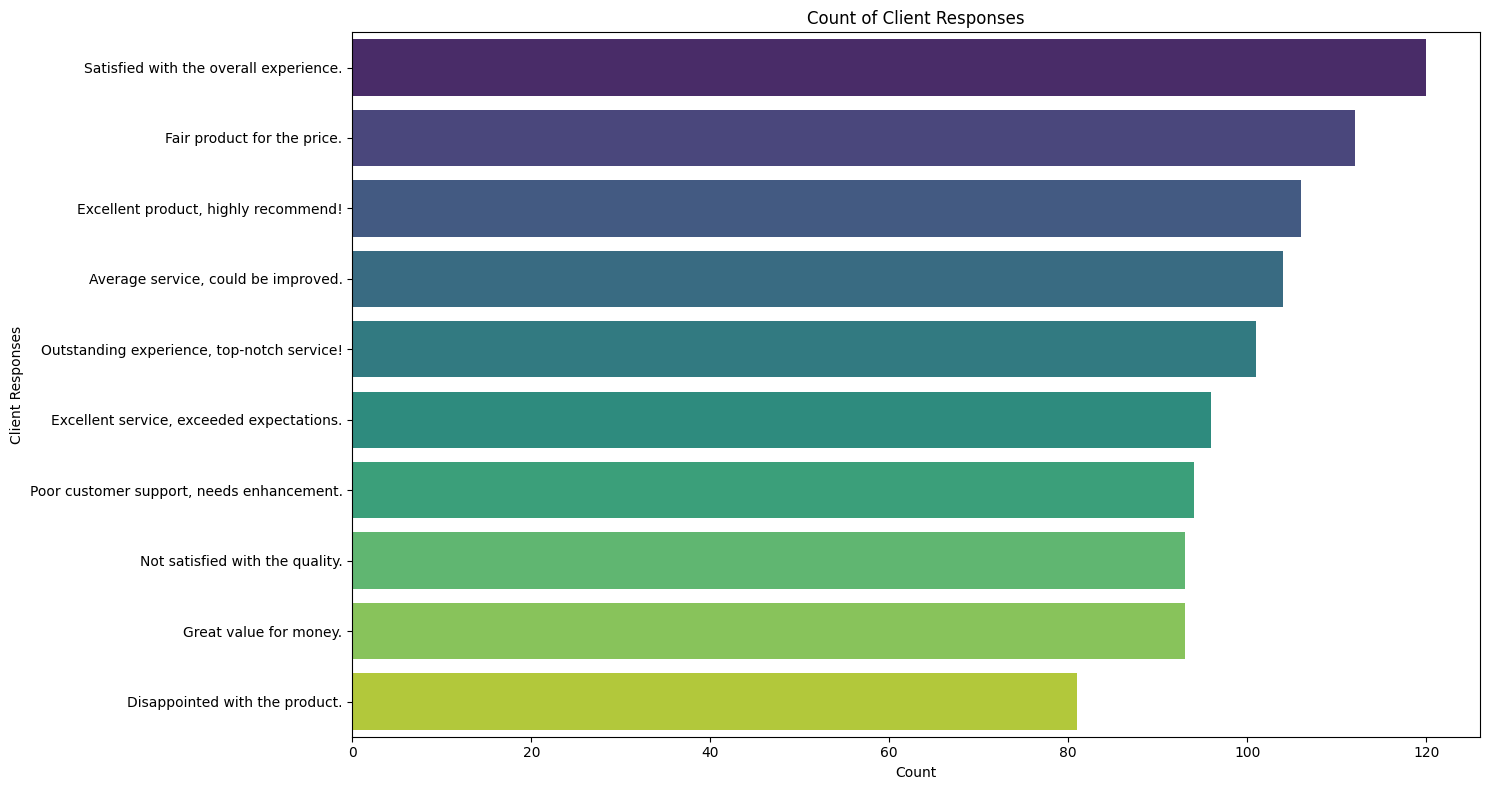

In [ ]:
# data analysis of client response (categorial data)
import pandas as pd
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Generate 1000 client responses with 10 different categories
categories = [
    "Excellent product, highly recommend!",
    "Average service, could be improved.",
    "Not satisfied with the quality.",
    "Outstanding experience, top-notch service!",
    "Fair product for the price.",
    "Poor customer support, needs enhancement.",
    "Satisfied with the overall experience.",
    "Great value for money.",
    "Disappointed with the product.",
    "Excellent service, exceeded expectations."
]

# Generate 1000 client responses randomly selecting from the categories
client_responses = [random.choice(categories) for _ in range(1000)]

# Create a DataFrame with client responses
df = pd.DataFrame({'Client Responses': client_responses})

# Count the occurrences of each category
response_counts = df['Client Responses'].value_counts()

# Sort the counts and get unique categories in the order of occurrence
unique_categories = response_counts.index.tolist()

# Create a mapping dictionary for category index to its count
category_count_map = {category: count for category, count in zip(unique_categories, response_counts)}

# Create a figure and axis object for the bar plot
plt.figure(figsize=(15, 8))

# Plotting the count of client responses for each category using a bar plot
sns.barplot(x=response_counts.values, y=response_counts.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Client Responses')
plt.title('Count of Client Responses')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


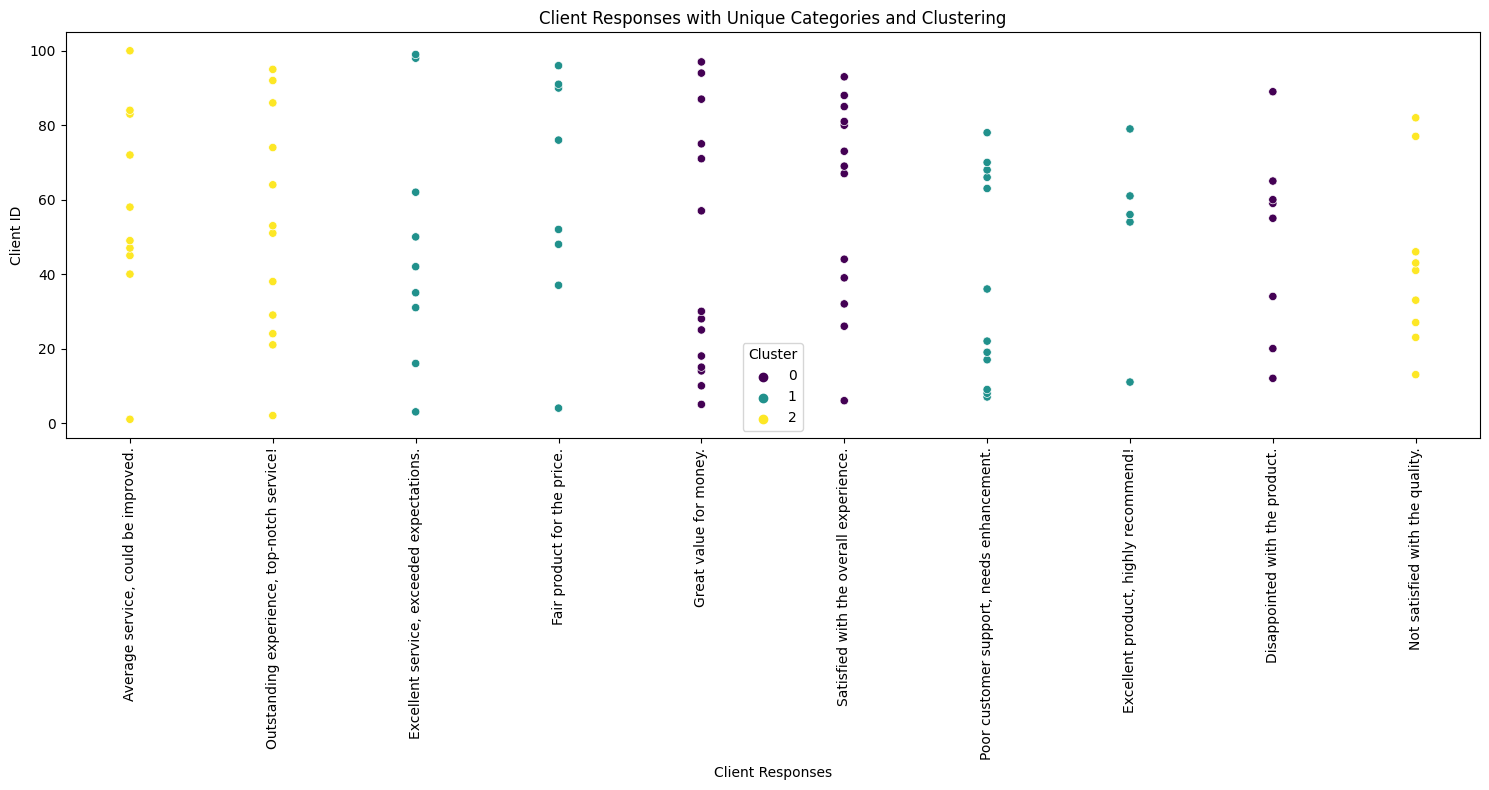

In [11]:
## clustering of categorial data when x axis is showing categories
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Generate 100 client responses with 10 different categories
categories = [
    "Excellent product, highly recommend!",
    "Average service, could be improved.",
    "Not satisfied with the quality.",
    "Outstanding experience, top-notch service!",
    "Fair product for the price.",
    "Poor customer support, needs enhancement.",
    "Satisfied with the overall experience.",
    "Great value for money.",
    "Disappointed with the product.",
    "Excellent service, exceeded expectations."
]

# Generate 100 client responses randomly selecting from the categories
client_responses = [random.choice(categories) for _ in range(100)]

# Extract unique categories
unique_categories = list(set(categories))

# Load a pre-trained BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Generate sentence embeddings for unique categories
category_embeddings = model.encode(unique_categories)

# Apply K-means clustering to category embeddings
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters for demonstration
clusters = kmeans.fit_predict(category_embeddings)

# Create a DataFrame with unique categories and cluster labels
df_categories = pd.DataFrame({'Category': unique_categories, 'Cluster': clusters})

# Create a mapping dictionary for category to cluster
category_cluster_map = {category: cluster for category, cluster in zip(unique_categories, clusters)}

# Map the cluster labels to the client responses
client_response_clusters = [category_cluster_map[response] for response in client_responses]

# Create a DataFrame with responses, cluster labels, and client IDs
df = pd.DataFrame({'Client Responses': client_responses, 'Cluster': client_response_clusters, 'Client ID': range(1, 101)})

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(15, 8))

# Plotting the client responses against their IDs with clustering
sns.scatterplot(data=df, x='Client Responses', y='Client ID', hue='Cluster', palette='viridis', ax=ax)
ax.set_xticks(range(len(unique_categories)))
ax.set_xticklabels(unique_categories, rotation=90)
ax.set_xlabel('Client Responses')
ax.set_ylabel('Client ID')
ax.set_title('Client Responses with Unique Categories and Clustering')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


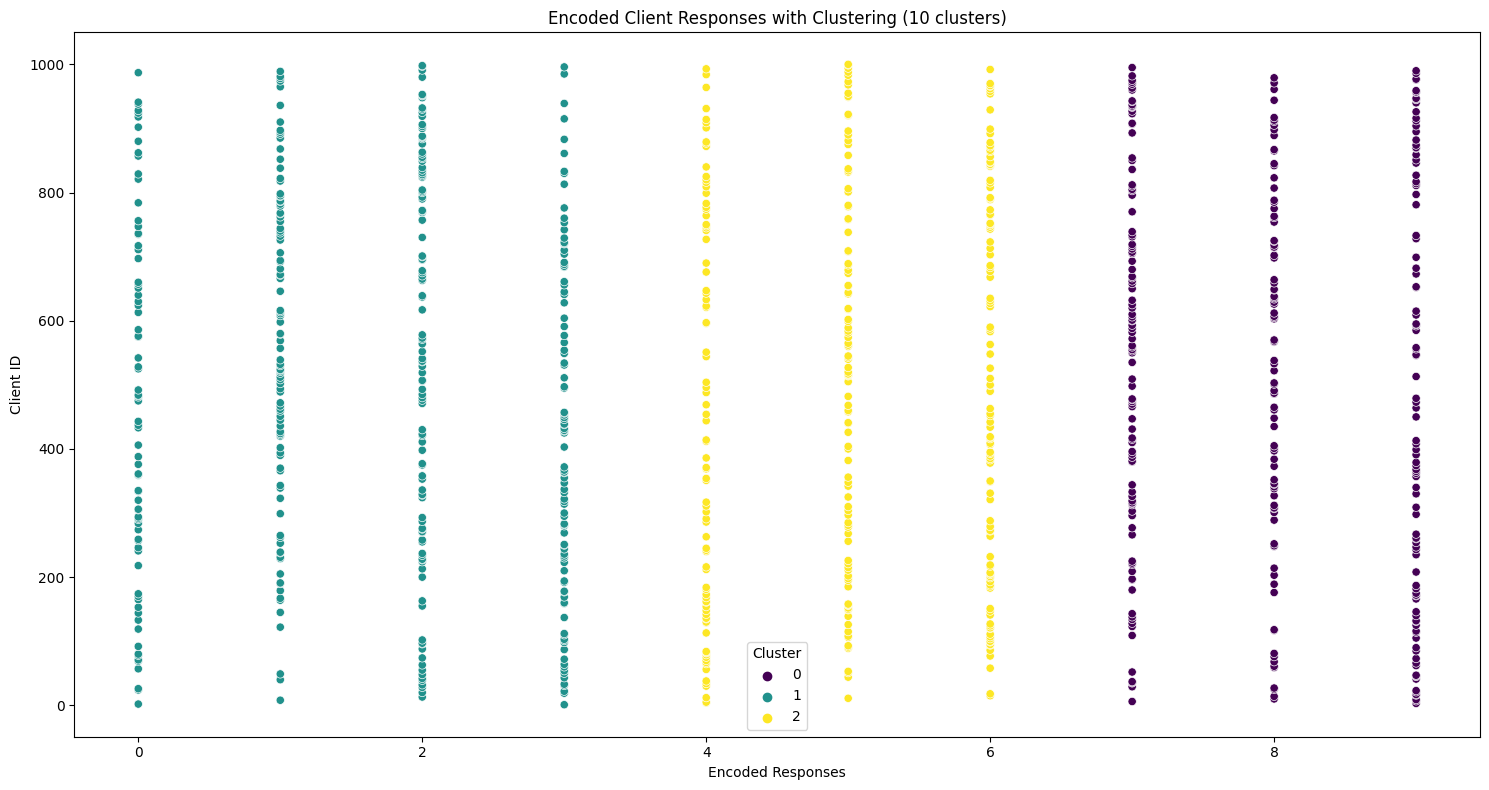

In [16]:
# Clustering of x axis when x axis is shwoing categories in terms of numerical values
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Generate 1000 client responses with 10 different categories
categories = [
    "Excellent product, highly recommend!",
    "Average service, could be improved.",
    "Not satisfied with the quality.",
    "Outstanding experience, top-notch service!",
    "Fair product for the price.",
    "Poor customer support, needs enhancement.",
    "Satisfied with the overall experience.",
    "Great value for money.",
    "Disappointed with the product.",
    "Excellent service, exceeded expectations."
]

# Generate 1000 client responses randomly selecting from the categories
client_responses = [random.choice(categories) for _ in range(1000)]

# Convert categories to numerical values using LabelEncoder
label_encoder = LabelEncoder()
client_responses_encoded = label_encoder.fit_transform(client_responses)

# Reshape the encoded responses to a 2D array
client_responses_encoded = client_responses_encoded.reshape(-1, 1)

# Apply K-means clustering with 10 clusters directly on encoded responses
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(client_responses_encoded)

# Create a DataFrame with encoded responses, cluster labels, and client IDs
df = pd.DataFrame({'Encoded Responses': client_responses_encoded.flatten(), 'Cluster': clusters, 'Client ID': range(1, 1001)})

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(15, 8))

# Plotting the encoded responses against their IDs with clustering
sns.scatterplot(data=df, x='Encoded Responses', y='Client ID', hue='Cluster', palette='viridis', ax=ax)
ax.set_xlabel('Encoded Responses')
ax.set_ylabel('Client ID')
ax.set_title('Encoded Client Responses with Clustering (10 clusters)')

plt.tight_layout()
plt.show()
